# The Beacon Chain Digest - May 24th

In this notebook, we take a look at the data from epochs 38320 - 39120 (May 21, 2021, 7:28PM GMT to May 24, 2021, 8:49AM GMT) and analyze the overall network performance of the Ethereum Proof-of-stake consensus chain mainnet through the lens of 6 metrics (attestor slashing, proposer slashing, proposed block count, global participation rate, new deposits and voluntary exit counts). 

We first collect the data using beaconcha.in's api, then proceed to explain these metrics and analyze the collected data using statistical methods and relavant visualizations. A similar notebook will be published once every 2 weeks, with an analysis of the data for these 2 weeks.

In [1]:
#Import all the modules 

import requests
import json
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly
pd.options.plotting.backend = "plotly"
import plotly.express as px

## Data Collection

In [77]:
#Dictionaries to store the data queried using the API end-points

# attestor_slashing = {}
# proposer_slashing = {}
# proposed_block_count = {}
# global_participation_rate = {}
# exit_counts = {}
deposits = {}

In [104]:
with open('api_key.txt', 'r') as api_file:
    api_key = api_file.read()

for epoch in range(38320,39121):
    x = requests.get('https://beaconcha.in/api/v1/epoch/{}?api_key={}'.format(epoch, api_key))
    #Add a sleep to stay within the call rate limits
    sleep(6)
    
    data = x.json()['data']
    
#     attestor_slashing[epoch] = data['attesterslashingscount']
#     proposer_slashing[epoch] = data['proposerslashingscount']
#     proposed_block_count[epoch] = data['proposedblocks']
#     global_participation_rate[epoch] = data['globalparticipationrate']
#     exit_counts[epoch] = data['voluntaryexitscount']
    deposits[epoch] = data['depositscount']

In [105]:
#Writing the dictionaries to csv files

# with open('attestor_slashing.csv','w') as result_file:
#     wr = csv.writer(result_file, dialect='excel')
#     for key, value in attestor_slashing.items():
#         wr.writerow([key,value])
        
# with open('proposer_slashing.csv','w') as result_file:
#     wr = csv.writer(result_file, dialect='excel')
#     for key, value in proposer_slashing.items():
#         wr.writerow([key,value])
        
# with open('proposed_block_count.csv','w') as result_file:
#     wr = csv.writer(result_file, dialect='excel')
#     for key, value in proposed_block_count.items():
#         wr.writerow([key,value])
        
# with open('global_participation_rate.csv','w') as result_file:
#     wr = csv.writer(result_file, dialect='excel')
#     for key, value in global_participation_rate.items():
#         wr.writerow([key,value])
        
# with open('exit_counts.csv','w') as result_file:
#     wr = csv.writer(result_file, dialect='excel')
#     for key, value in exit_counts.items():
#         wr.writerow([key,value])
        
with open('deposits.csv','w') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    for key, value in deposits.items():
        wr.writerow([key,value])

On doing some simple formatting and merging on excel, the final csv files with all 5 metrics is prepared

In [3]:
df1 = pd.read_csv('attestor_slashing.csv', header= None, names = ["epoch","attestor_slashing"])
df2 = pd.read_csv('proposer_slashing.csv', header= None, names = ["epoch","proposer_slashing"])
df3 = pd.read_csv('proposed_block_count.csv', header= None, names = ["epoch","block_count"])
df4 = pd.read_csv('global_participation_rate.csv', header= None, names = ["epoch","participation_rate"])
df5 = pd.read_csv('exit_counts.csv', header= None, names = ["epoch","exit_count"])
df6 = pd.read_csv('deposits.csv', header= None, names = ["epoch","deposits"])

df = pd.merge(df1, df2, on ='epoch')
df = pd.merge(df, df3, on ='epoch')
df = pd.merge(df, df4, on ='epoch')
df = pd.merge(df, df5, on ='epoch')
df = pd.merge(df, df6, on ='epoch')

print(df.head())

   epoch  attestor_slashing  proposer_slashing  block_count  \
0  38320                  0                  0           32   
1  38321                  0                  0           32   
2  38322                  0                  0           32   
3  38323                  0                  0           31   
4  38324                  0                  0           32   

   participation_rate  exit_count  deposits  
0            0.994738         0.0         0  
1            0.993110         0.0         0  
2            0.995255         0.0         0  
3            0.993418         0.0         0  
4            0.995465         0.0         0  


## Attestor and proposer slashing events

As per protocol rules, there are certain offences that if beacon chain validators commit, warrants some of their stake to be slashed. On committing such offences a portion of the validator's stake is slashed and the validator is forced to exit the network. 

[Slashable offences](https://ethos.dev/beacon-chain/#slashable-offences) include: 

- Double proposals
- Surround votes 
- Double votes

Note that an honest validator cannot be slashed by the actions of other validators.

We now take a look at the number of slashing events that occurred in each epoch for the given range

Epoch: 38518, Number of attestors slashed: 1


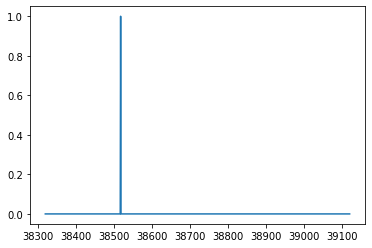

In [4]:
#Attestor Slashing

attestor_slashing_events = df['attestor_slashing']
attestor_slashing_events_unique = set(attestor_slashing_events)
num_of_events = len(attestor_slashing_events_unique) #output value = 2
#print("The number of unique values in the attestor_slashing_events series is: {}".format(num_of_events))

#Thus, there have been one or more attestor slashing events that have occured during this range of epochs 

plt.plot(df['epoch'],df['attestor_slashing']) 

for i in range(0,801):
    if df['attestor_slashing'][i] != 0:
        print("Epoch: {}, Number of attestors slashed: {}".format(df['epoch'][i],df['attestor_slashing'][i]))

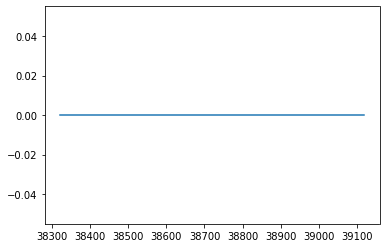

In [5]:
#Proposer Slashing

proposer_slashing_events = df['proposer_slashing']
proposer_slashing_events_unique = set(proposer_slashing_events)
num_of_events = len(proposer_slashing_events_unique) #output value = 1
#print("The number of unique values in the proposer_slashing_events series is: {}".format(num_of_events))

#Thus, there have been no proposer slashing events that have occured during this range of epochs 

plt.plot(df['epoch'],df['proposer_slashing']) 

# for i in range(0,801):
#     if df['proposer_slashing'][i] != 0:
#         print("Epoch: {}, Number of proposers slashed: {}".format(df['epoch'][i],df['proposer_slashing'][i]))

Thus we can see that in the range of epochs 38320 - 39120, there has been only one attestor slashing event where one validator was slashed at epoch 38518 and no proposer slashing events

## Proposed block count

In eth2.0, each epoch is divided into 32 slots. Each slot can be thought of as an opportunity to produce a block, which means that there is no guarantee that a block is produced in each slot. However, when the network is performing optimally and the validators are perfoming well in their duties as block producers, every slot will have a block produced meaning that every epoch will have 32 blocks produced. 

Thus, one way to measure the network's performance is to look at the number of blocks that have been produced in each epoch. If this number is 32 or is at least close to 32, the network is considered to be performing well. 

We now look at the number of blocks produced at each epoch for this range.

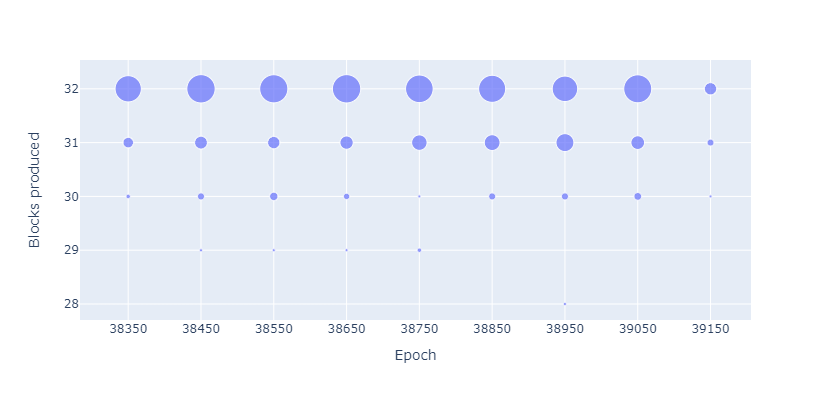

In [20]:
bucket_size = 100
df["bucket"] = np.floor_divide(df["epoch"], bucket_size)
df["n_bxs"] = 1
df_bucket = df[["bucket", "block_count", "n_bxs"]].groupby(["bucket", "block_count"]).sum("n_bxs").reset_index()
df_bucket["epoch"] = df_bucket["bucket"] * bucket_size + bucket_size / 2.0

fig = px.scatter(df_bucket, x = 'epoch', y = 'block_count', size = 'n_bxs', width=600, height=400, labels={ "block_count": "Blocks produced", "epoch": "Epoch", "n_bxs": "Count" })
fig.update_layout(xaxis=dict(
    tickmode = 'array',
    tickvals = df_bucket['epoch'],
    ticktext = [str(int(s)) for s in df_bucket['epoch']]
))

In [227]:
print("frequncy table for first 200  epochs in this range")
print(pd.crosstab(index=df['block_count'][0:200], columns='count'))
print("frequncy table for second 200  epochs in this range")
print(pd.crosstab(index=df['block_count'][200:400], columns='count'))
print("frequncy table for third 200  epochs in this range")
print(pd.crosstab(index=df['block_count'][400:600], columns='count'))
print("frequncy table for fourth 200  epochs in this range")
print(pd.crosstab(index=df['block_count'][600:801], columns='count'))

frequncy table for first 200  epochs in this range
col_0        count
block_count       
29               1
30               9
31              30
32             160
frequncy table for second 200  epochs in this range
col_0        count
block_count       
29               2
30               9
31              33
32             156
frequncy table for third 200  epochs in this range
col_0        count
block_count       
28               1
29               2
30               6
31              50
32             141
frequncy table for fourth 200  epochs in this range
col_0        count
block_count       
30              12
31              47
32             142


We thus see that the number of blocks produced is between 31-32 for most epochs, indicating an overall healthy network.

However, they were around 5 epochs for which this value fell to 29 and one epoch (at around 38900) for which this value fell down to 28. But all in all a minimum value of 28 for this metric is a sign of an overall well performing network of validators. 

## Participation rate

In the eth2.0 protocol, every validator is expected to submit their attestation once every epoch. However, they might be many different reasons because of which validators might fail to do so, such as validators going offline for long periods of time.

The network participation rate can be defined as the percentage of staked ether which sends in their attestations in a timely manner when called to do so. This is a very important metric with a high value indicating that the network is healthy and a low value hinting at a range of issues form software bugs to latency issues.

This [blog post](https://pintail.xyz/posts/medalla-validator-taxonomy) by [pintail](https://twitter.com/pintail_xyz) lists some reasons for which the network participation rate might be low. 

We now look at the network participation statistics for this range of epochs. In our dataset, percentages are represented as fractions. 

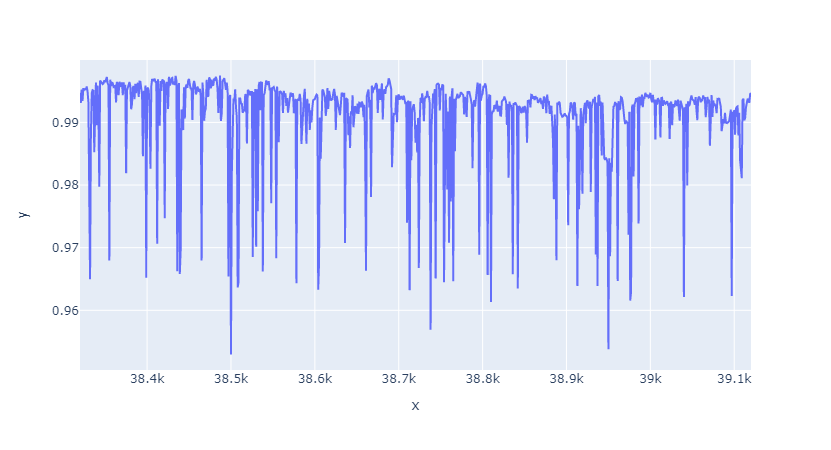

In [35]:
px.line(x=df['epoch'], y=df['participation_rate'])

In [36]:
mean = df['participation_rate'].mean()
std = df['participation_rate'].std()
mini = min(df['participation_rate'])
median = df['participation_rate'].quantile(0.5)
maxi = max(df['participation_rate'])

print("           participation statistics")
print("-----------------------------------------------")
print("mean: {}".format(mean))
print("standard devidation: {}".format(std))
print("")
print("minimum: {}".format(mini))
print("median: {}".format(median))
print("maximum: {}".format(maxi))

           participation statistics
-----------------------------------------------
mean: 0.9912720623033707
standard devidation: 0.007331661417942296

minimum: 0.952943563
median: 0.993417561
maximum: 0.997489095


We notice that on average, the network participation rate is pretty high! (with a mean of about 0.991 and a standard deviation of 0.007)! The network participation rate never went below 95.3% which is another sign of an overall healthy network

## Exit counts

The next metric that we explore in this notebook is the number of validators who voluntarily exited the network.

A validator who performs a voluntary exit is one who chooses to voluntarily stop performing their validator duties (proposing blocks and attesting to blocks).

A validator can initiate a voluntary exit provided that the validator is currently active, has not been slashed and has been active for at least 256 epochs (~27 hours) since it has been activated

It takes at a minimum 5 epochs (32 minutes) for a validator to exit after initiating a voluntary exit. This number can be much higher depending on how many other validators are queued to exit.

(reference: https://lighthouse-book.sigmaprime.io/voluntary-exit.html)

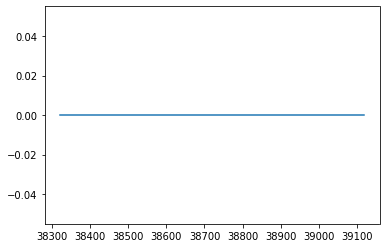

In [37]:
exit_count = df['exit_count']
exit_count_unique = set(exit_count)
num_of_exits = len(exit_count_unique) #output value = 1
#print("The number of unique values in the proposer_slashing_events series is: {}".format(num_of_events))

#Thus, there have been no voluntary exits that have occured during this range of epochs 

plt.plot(df['epoch'],df['exit_count']) 


Thus we can see that in the range of epochs 38320 - 39120, there has been only no voluntary exists by any validator 

## Deposit Counts

The final metric that we explore in this notebook is the number of deposits made in that epoch. 

If a validator makes a deposit of at least 32ETH, he then gets added into the activtion queue. Once the validator reaches the end of the activation queue he gets activated and is assigned to a committee and can begin attesting/proposing blocks.

Thus looking at the deposits count per epoch gives us an idea of the number of new validators activated over time.

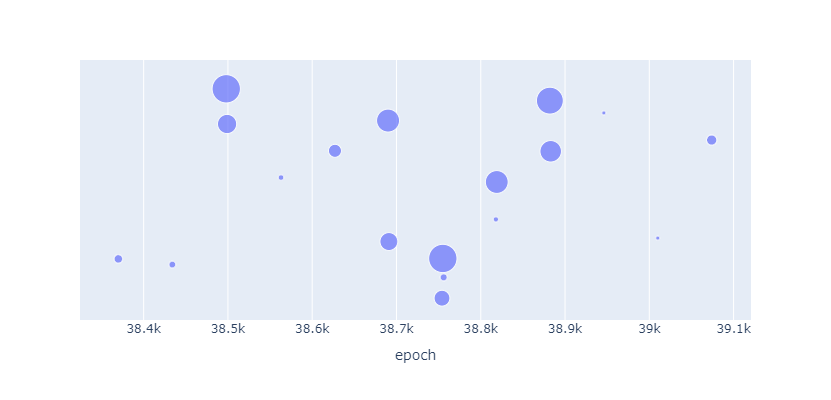

In [60]:
rng = np.random.default_rng(42)
df['temp'] = rng.uniform(0, 10, len(df["epoch"]))
fig = px.scatter(df[df.deposits > 0], x = 'epoch', y = 'temp', size = 'deposits', size_max = 20, width = 800, height = 400)
fig.update_yaxes(visible=False)

We notice that in this range of epochs there are a handful during which multiple validators were activated at one shot. For some epochs (around 38500,28750,38890) this number even exceeded 400.

It is quite likely that in such cases all the validators that were activated belong to the same entity, but this hypothesis can only be verfied after looking more closely into the addresses that made these deposits. 

## Acknowledgements 

A huge thank you to [Barnabé Monnot](https://twitter.com/barnabemonnot?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) for all his very valuable insights into this analysis and for answering my numerous questions on the Eth2.0 specs.

Thank you to [Pintail](https://twitter.com/pintail_xyz) for his [blog series](https://pintail.xyz/posts/medalla-tldr/) from which I learnt a lot to succesfully carry out this analysis. 